In [1]:
# import library
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
import matplotlib
from scipy.stats import pointbiserialr, chi2_contingency

In [2]:
# load dataset
data_path = '../data/raw/data.csv' 
data = pd.read_csv(data_path, delimiter=';')

# Rename column name
data.rename(columns={'Daytime/evening attendance\t':'Daytime/evening attendance'}, inplace=True)
data.rename(columns={'Nacionality':'Nationality'}, inplace=True)

In [3]:
# Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
# Replace integer values of Categorical features with corresponding string values

martial_status_mapping = {1 : 'single', 2 : 'married', 3 : 'widower', 4 : 'divorced', 5 : 'facto union', 6 : 'legally separated'}
data["Marital status"] = data["Marital status"].replace(martial_status_mapping)

application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}
data["Application mode"] = data["Application mode"].replace(application_mode_mapping)

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}
data["Course"] = data["Course"].replace(course_mapping)

attendance_mapping = {1: 'daytime', 0: 'evening'}
data["Daytime/evening attendance"] = data["Daytime/evening attendance"].replace(attendance_mapping)

previous_qualification_mapping = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master's",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}
data["Previous qualification"] = data["Previous qualification"].replace(previous_qualification_mapping)

nationality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}
data["Nationality"] = data["Nationality"].replace(nationality_mapping)

qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-professional course',
    25: 'Complementary High School Course - not concluded',
    26: '7th Year of Schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th Year of Schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: "Can't read or write",
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}   
data["Mother's qualification"] = data["Mother's qualification"].replace(qualification_mapping)
data["Father's qualification"] = data["Father's qualification"].replace(qualification_mapping)

occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}
data["Mother's occupation"] = data["Mother's occupation"].replace(occupation_mapping)
data["Father's occupation"] = data["Father's occupation"].replace(occupation_mapping)

binary_mapping = {1: 'yes', 0: 'no'}
data["Displaced"] = data["Displaced"].replace(binary_mapping)
data["Educational special needs"] = data["Educational special needs"].replace(binary_mapping)
data["Debtor"] = data["Debtor"].replace(binary_mapping)
data["Tuition fees up to date"] = data["Tuition fees up to date"].replace(binary_mapping)
data["Scholarship holder"] = data["Scholarship holder"].replace(binary_mapping)
data["International"] = data["International"].replace(binary_mapping)

gender_mapping = {1: 'male', 0: 'female'}
data["Gender"] = data["Gender"].replace(gender_mapping)

In [5]:
# Sample Data
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
# Data Overview after mapping
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

In [7]:
# Convert object type to categorical
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Convert to ordinal categorical
application_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
application_dtype = CategoricalDtype(categories=application_order, ordered=True)
data['Application order'] = data['Application order'].astype(application_dtype)

categorical_cols = data.select_dtypes(include=['category']).columns
categorical_cols = categorical_cols.drop('Target')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nationality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [8]:
# Number of unique values
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nationality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [9]:
# Descriptive Statistics of Numerical features
data.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


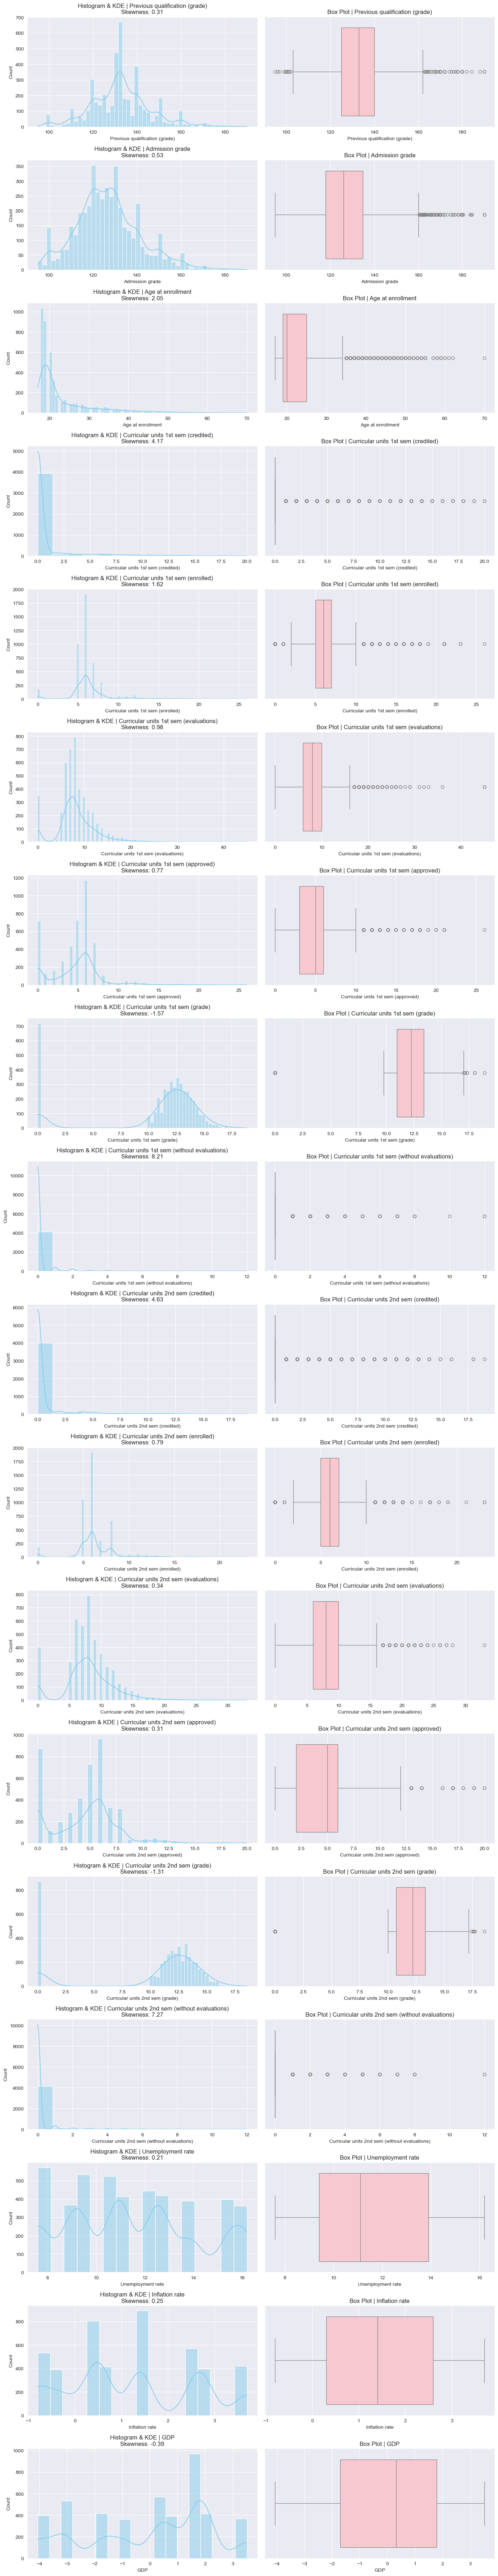

In [10]:
# Plots of Numerical features
numerical_cols = data.select_dtypes(include=['number']).columns

sns.set_style("darkgrid")
plt.figure(figsize=(14, len(numerical_cols) * 4))
for idx, feature in enumerate(numerical_cols, 1):

    # Histogram with KDE
    plt.subplot(len(numerical_cols), 2, 2* idx - 1)
    sns.histplot(data[feature], kde=True, color="skyblue")
    plt.title(f"Histogram & KDE | {feature}\nSkewness: {round(data[feature].skew(), 2)}")
    plt.xlabel(feature)

    # Box Plot
    plt.subplot(len(numerical_cols), 2, 2 * idx)
    sns.boxplot(x=data[feature], color="pink")
    plt.title(f"Box Plot | {feature}")
    plt.xlabel(feature)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

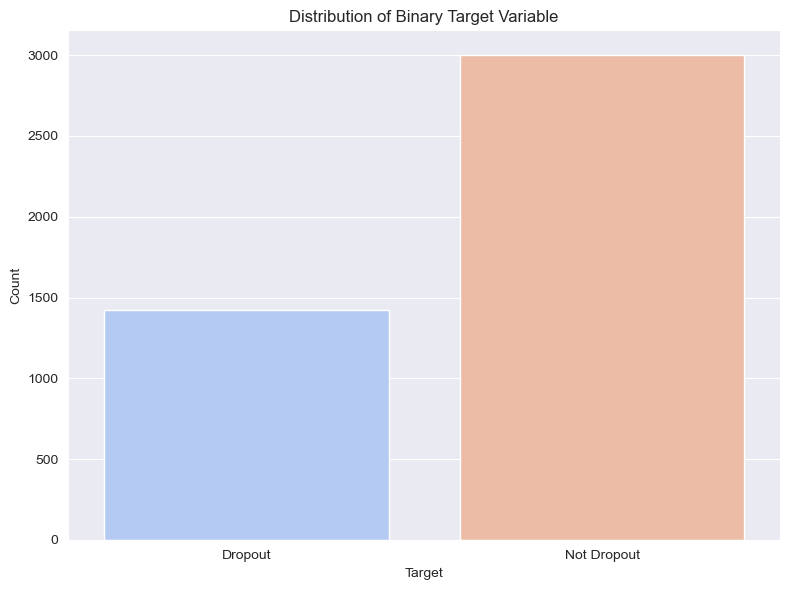

In [11]:
# Map the target to binary
target_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 1}
data['Target_binary'] = data['Target'].map(target_mapping)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(
    x=data['Target_binary'], 
    hue=data['Target_binary'],  # Assign the same variable to hue
    palette='coolwarm',         # Apply the palette
    legend=False                # Disable the legend
)
plt.xticks([0, 1], labels=['Dropout', 'Not Dropout'])  # Replace numerical labels with text
plt.title("Distribution of Binary Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [12]:
# Calculate the counts of each category
target_counts = data['Target_binary'].value_counts()

# Calculate the ratio
dropout_ratio = target_counts[0] / target_counts.sum()
not_dropout_ratio = target_counts[1] / target_counts.sum()

# Display results
print(f"Ratio of Dropout: {dropout_ratio:.2%}")
print(f"Ratio of Not Dropout: {not_dropout_ratio:.2%}")


Ratio of Dropout: 32.12%
Ratio of Not Dropout: 67.88%


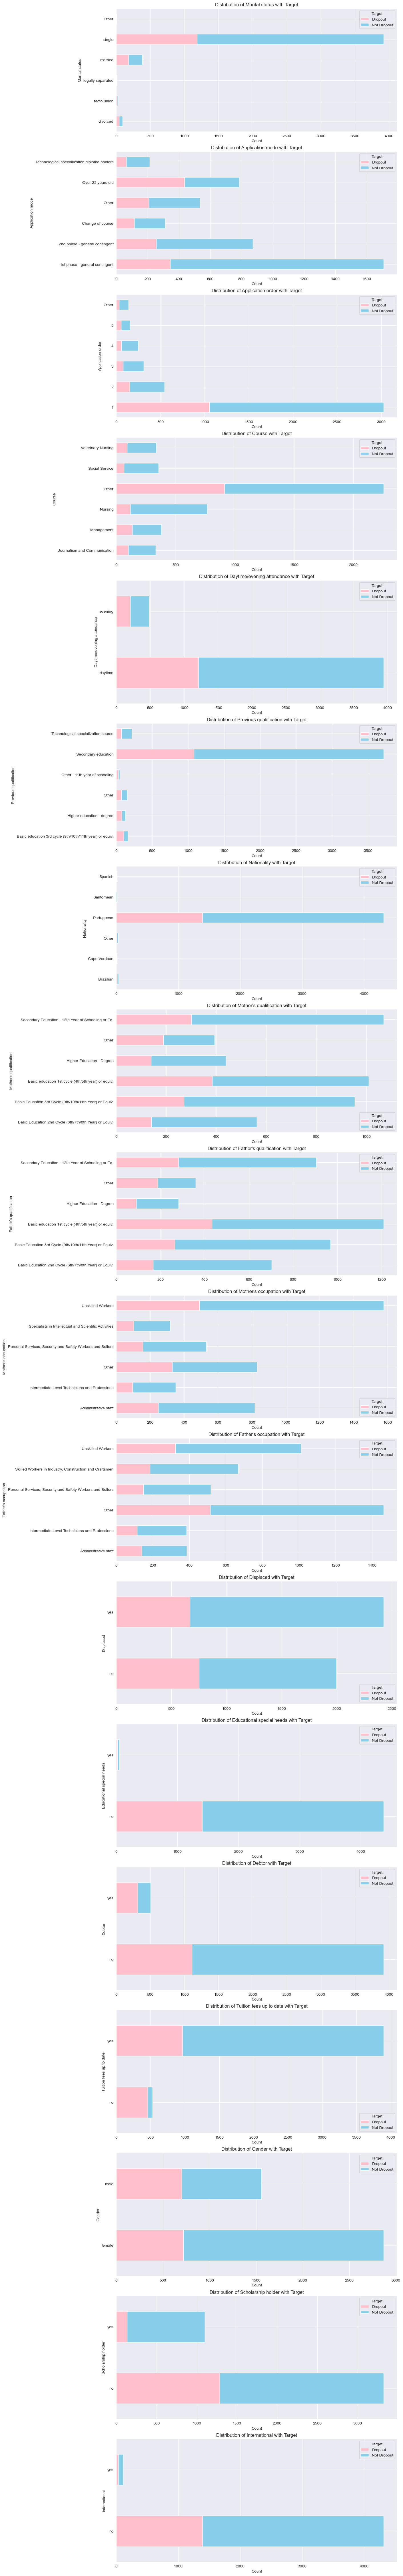

In [13]:
# Plots of Categorical features

# Custom palette
custom_palette = {0: 'pink', 1: 'skyblue'}

# Set figure size
plt.figure(figsize=(14, len(categorical_cols) * 5), constrained_layout=True)

# Function to combine small categories but retain at least 5
def combine_small_categories(series, threshold=0.1, min_categories=5):
    total = series.value_counts().sum()
    value_counts = series.value_counts()
    
    # Keep the top `min_categories`
    top_categories = value_counts.nlargest(min_categories).index
    combined = series.apply(lambda x: x if x in top_categories else 'Other')
    return combined

# Define the mapping from 0, 1 to 'Not Dropout' and 'Dropout'
target_mapping = {0: 'Dropout', 1: 'Not Dropout'}

for idx, feature in enumerate(categorical_cols, 1):
    # Combine small categories
    combined_feature = combine_small_categories(data[feature], threshold=0.1, min_categories=5)
    
    # Create a DataFrame with both the combined feature and target variable
    combined_df = pd.DataFrame({
        feature: combined_feature,
        'Target': data['Target_binary'].replace(target_mapping) 
    })
    
    # Compute value counts for each category and target value
    value_counts = combined_df.groupby([feature, 'Target'], observed=False).size().unstack(fill_value=0)
    
    # Plot stacked bar chart
    plt.subplot(len(categorical_cols), 1, idx)
    value_counts.plot(kind='barh', stacked=True, color=[custom_palette[0], custom_palette[1]], ax=plt.gca())

    # Set titles and labels
    plt.title(f"Distribution of {feature} with Target")
    plt.xlabel("Count")
    plt.ylabel(feature)

    # Add legend with custom labels
    plt.legend(title='Target', labels=['Dropout', 'Not Dropout'])

# Show plots
plt.show()


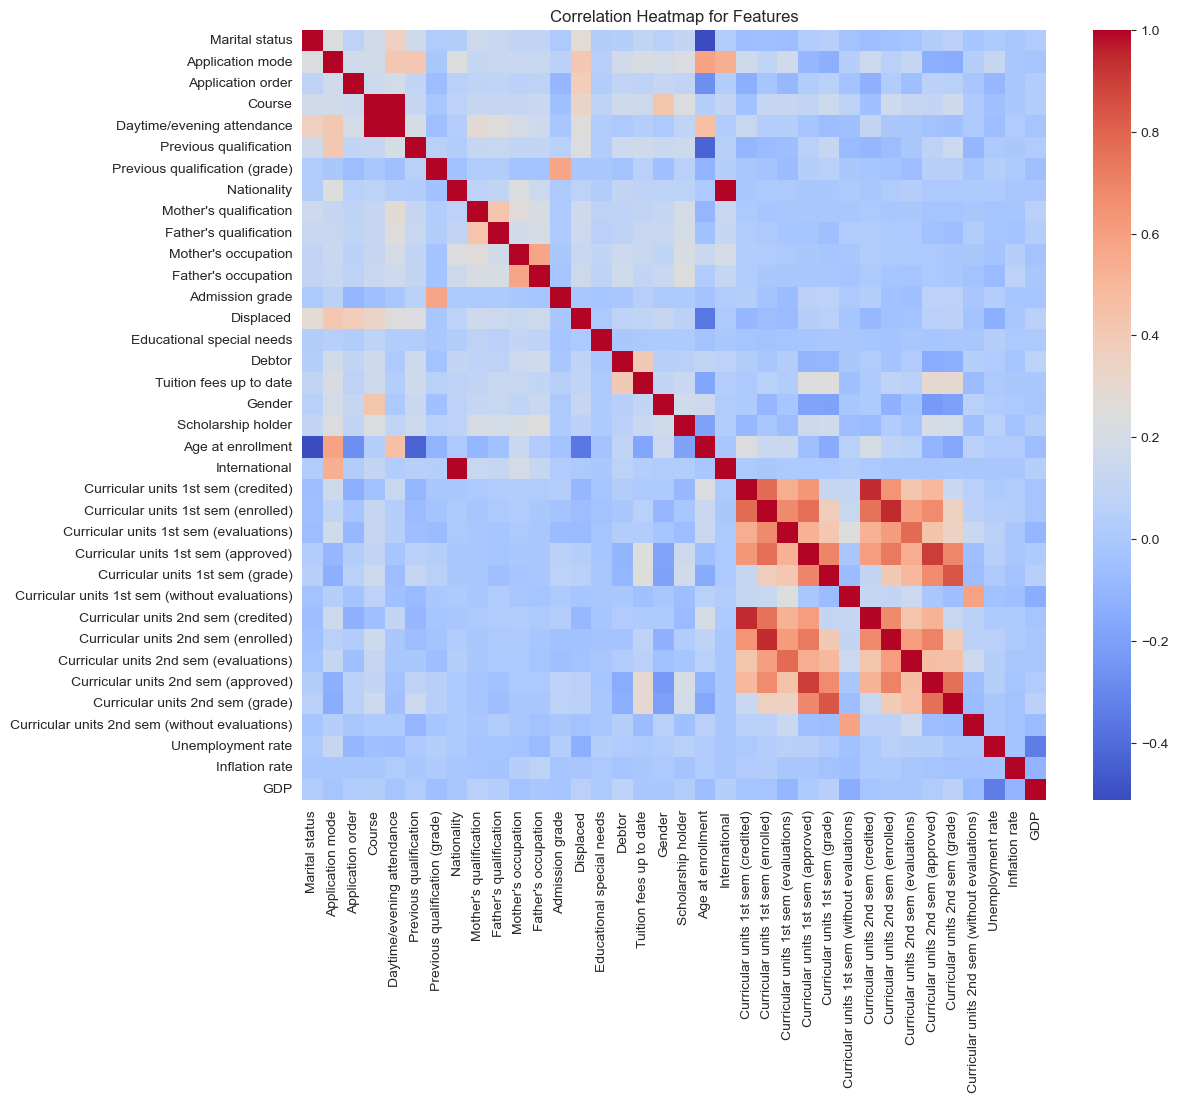

In [14]:
# Function to compute Cramér's V (Categorical - Categorical)

def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Function to compute correlation matrix for mixed data
def compute_correlation_matrix(df, numerical_cols, categorical_cols):
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            
            # Correlation with itself
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0  

            # Numerical - Numerical
            elif col1 in numerical_cols and col2 in numerical_cols:
                corr_matrix.loc[col1, col2] = df[col1].corr(df[col2])  # Pearson/Spearman

            # Categorical - Categorical
            elif col1 in categorical_cols and col2 in categorical_cols:
                contingency_table = pd.crosstab(df[col1], df[col2])
                corr_matrix.loc[col1, col2] = cramers_v(contingency_table)

            # Categorical - Numerical
            elif col1 in numerical_cols and col2 in categorical_cols:
                # Use the integer codes of categorical variable for correlation
                corr, _ = pointbiserialr(df[col2].cat.codes, df[col1])  # Using .cat.codes for categorical variable
                corr_matrix.loc[col1, col2] = corr

            elif col1 in categorical_cols and col2 in numerical_cols:
                # Use the integer codes of categorical variable for correlation
                corr, _ = pointbiserialr(df[col1].cat.codes, df[col2])  # Using .cat.codes for categorical variable
                corr_matrix.loc[col1, col2] = corr

    return corr_matrix.astype(float)  # Convert all to numeric


# Compute the correlation matrix
corr_matrix = compute_correlation_matrix(data, numerical_cols, categorical_cols)

# Drop the 'Target' from the correlation matrix
corr_matrix_no_target = corr_matrix.drop(['Target', 'Target_binary'], axis=0).drop(['Target', 'Target_binary'], axis=1)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_no_target, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Features")
plt.show()


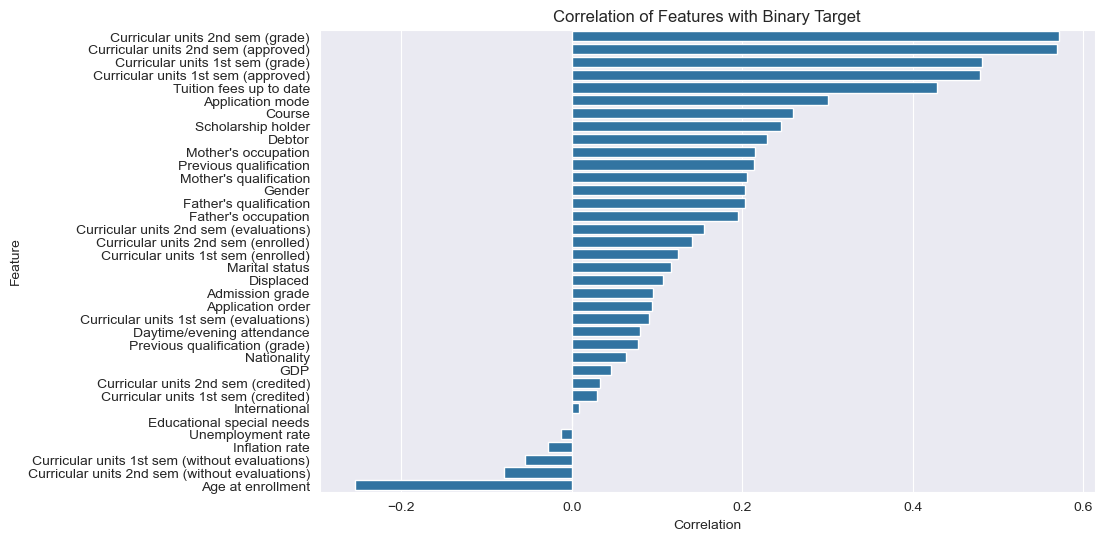

In [15]:
# Correlation of Features with Binary Target

# Calculate correlation with numerical features
numerical_corr = {}
for col in numerical_cols:
    corr, _ = pointbiserialr(data['Target_binary'], data[col])
    numerical_corr[col] = corr

# Calculate correlation with categorical features
categorical_corr = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(data['Target_binary'], data[col])
    categorical_corr[col] = cramers_v(contingency_table)

# Combine numerical and categorical correlations into a single dictionary
all_correlations = {**numerical_corr, **categorical_corr}

# Convert to DataFrame
corr_df = pd.DataFrame(list(all_correlations.items()), columns=['Feature', 'Correlation'])

# Sort in descending order
corr_df_sorted = corr_df.sort_values(by='Correlation', ascending=False)

# Plot the correlation using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=corr_df_sorted)
plt.title("Correlation of Features with Binary Target")
plt.show()

In [16]:
# Save dataframe for preprocessing
data = data.drop(columns=['Target'])

# Rename column
# Keep Target as binary form
data = data.rename(columns={'Target_binary': 'Target'})

# Save the DataFrame to a CSV file
data.to_csv('../data/processed/data_for_outlier.csv', index=False)